In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기

In [3]:
cctv = pd.read_csv('서울cctv.csv')

In [4]:
pop = pd.read_csv('서울인구.csv')

In [5]:
crime = pd.read_csv('서울범죄.csv',encoding='utf-8')

In [6]:
cctv.head()

,자치구,안심 주소,위도,경도,CCTV 수량,수정 일시
0,중랑구,중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032,37.5977,127.0728,1,2022-12-01
1,중랑구,면목2동 146-1(고정3)_C-MM02-0013-C,37.5879,127.0812,1,2022-12-01
2,중랑구,중화2동 326-88 (골목길 통신주)_C-JH02-0032-1,37.5976,127.0727,1,2022-12-01
3,중랑구,면목2동 146-1(고정2)_C-MM02-0013-B,37.5879,127.0812,1,2022-12-01
4,중랑구,중화2동 327-27 (고정)_C-JH02-0044-A,37.5986,127.0747,1,2022-12-01


In [7]:
pop.head()

,시점,구분별(1),구분별(2),동별(1),동별(2),데이터
0,2023 3/4,한국인 (명),남자,합계,종로구,67625
1,2023 3/4,한국인 (명),남자,합계,중구,58788
2,2023 3/4,한국인 (명),남자,합계,용산구,103804
3,2023 3/4,한국인 (명),남자,합계,성동구,135143
4,2023 3/4,한국인 (명),남자,합계,광진구,161892


In [8]:
# 컬럼명 변경

pop.rename(columns = {'동별(2)':'자치구', '구분별(1)':'국적', '구분별(2)':'성별', '데이터':'인구수'}, inplace=True)

In [9]:
crime.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,"강간,추행",발생,109


In [10]:
# 필요없는 컬럼 삭제

cctv.drop(columns = ['수정 일시'], inplace=True)
pop.drop(columns = ['시점'], inplace=True)

In [11]:
pop['동별(1)'].unique()

array(['합계'], dtype=object)

In [12]:
pop.drop(columns = ['동별(1)'], inplace=True)

In [13]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83734 entries, 0 to 83733
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      83734 non-null  object 
 1   안심 주소    83734 non-null  object 
 2   위도       83734 non-null  float64
 3   경도       83734 non-null  float64
 4   CCTV 수량  83734 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 3.2+ MB


In [14]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      100 non-null    object
 1   성별      100 non-null    object
 2   자치구     100 non-null    object
 3   인구수     100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [15]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [16]:
crime['구분'].unique()

array(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포',
       '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동',
       '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype=object)

In [17]:
crime.rename(columns={'구분':'관서'}, inplace=True)

In [18]:
# crime데이터에 자치구 정보 추가를 위한 경찰서 정보 데이터 불러오기

pol = pd.read_csv('서울경찰서.csv')

In [19]:
pol.head()

,관서,주소
0,서울강남경찰서,서울시 강남구 테헤란로 114길 11
1,서울강동경찰서,서울시 강동구 성내로 57
2,서울강북경찰서,서울시 강북구 오패산로 406
3,서울강서경찰서,서울시 강서구 화곡로 308
4,서울관악경찰서,서울시 관악구 관악로5길 33


In [20]:
# 관서명 변경

In [21]:
pol['관서'] = pol['관서'].str.replace('서울', '')
pol['관서'] = pol['관서'].str.replace('경찰서', '')

pol

,관서,주소
0,강남,서울시 강남구 테헤란로 114길 11
1,강동,서울시 강동구 성내로 57
2,강북,서울시 강북구 오패산로 406
3,강서,서울시 강서구 화곡로 308
4,관악,서울시 관악구 관악로5길 33
5,광진,서울시 광진구 자양로 167
6,구로,서울시 구로구 가마산로 235
7,금천,서울시 금천구 시흥대로73길 50
8,남대문,서울시 중구 한강대로 410
9,노원,서울시 노원구 노원로 283


In [22]:
# 자치구 컬럼 생성

In [23]:
pol['자치구'] = pol['주소'].str.split(' ').str[1]

In [24]:
pol.drop(columns = ['주소'], inplace=True)

In [25]:
# crime 데이터와 합치기

In [26]:
crime = pd.merge(crime, pol, on = '관서')

In [27]:
crime

,관서,죄종,발생검거,건수,자치구
0,중부,살인,발생,4,중구
1,중부,살인,검거,4,중구
2,중부,강도,발생,3,중구
3,중부,강도,검거,3,중구
4,중부,"강간,추행",발생,109,중구
...,...,...,...,...,...
305,수서,"강간,추행",검거,129,강남구
306,수서,절도,발생,855,강남구
307,수서,절도,검거,423,강남구
308,수서,폭력,발생,1198,강남구


In [28]:
# pivot하여 데이터 정리
crime.drop(columns = ['관서'], inplace=True)

crime = crime.pivot_table(crime, index=['자치구'],
                          columns=['죄종', '발생검거'],
                          aggfunc=[np.sum])
crime

sum                                                               \
        건수                                                                
죄종      강간         강간,추행           강도          살인            절도           
발생검거    검거     발생     검거     발생    검거    발생    검거    발생      검거      발생   
자치구                                                                       
강남구    NaN    NaN  454.0  578.0  23.0  25.0  11.0  12.0  1160.0  2372.0   
강동구    NaN    NaN  103.0  124.0   6.0   6.0   3.0   3.0   889.0  1612.0   
강북구    NaN    NaN  115.0  136.0   1.0   1.0   4.0   4.0   537.0   777.0   
강서구    NaN    NaN  188.0  246.0   3.0   3.0   7.0   9.0   921.0  1540.0   
관악구    NaN    NaN  269.0  321.0   6.0   7.0   4.0   8.0   929.0  1860.0   
광진구    NaN    NaN  161.0  208.0   4.0   4.0   3.0   5.0   754.0  1414.0   
구로구    NaN    NaN  118.0  182.0   1.0   2.0   5.0   5.0   770.0  1390.0   
금천구    NaN    NaN  103.0  134.0   4.0   3.0   6.0   7.0   520.0  1013.0   
노원구    NaN    NaN  126.0  156.0   3.0   3.0   6.0   6.0   654.0  1361.0   
도봉구   64.0   72.0    NaN    NaN   1.0   2.0   2.0   2.0   376.0   772.0   
동대문구   NaN    NaN  147.0  169.0   8.0   7.0   4.0   3.0   659.0  1240.0   
동작구    NaN    NaN   94.0  180.0   1.0   1.0   3.0   2.0   675.0  1129.0   
마포구    NaN    NaN  275.0  321.0   4.0   4.0   3.0   4.0   730.0  1510.0   
서대문구   NaN    NaN  120.0  137.0   2.0   2.0   3.0   3.0   562.0  1027.0   
서초구   37.0   47.0  191.0  265.0   5.0   5.0   9.0   9.0   691.0  1503.0   
성동구    NaN    NaN   82.0  110.0   1.0   4.0   4.0   3.0   497.0   905.0   
성북구   88.0  118.0    NaN    NaN   2.0   2.0   3.0   4.0   474.0   895.0   
송파구    NaN    NaN  216.0  247.0   6.0   7.0   3.0   3.0   995.0  2024.0   
양천구   92.0  116.0    NaN    NaN   3.0   3.0   1.0   1.0   700.0  1349.0   
영등포구   NaN    NaN  196.0  279.0  11.0  11.0   8.0   8.0   831.0  1712.0   
용산구    NaN    NaN  103.0  141.0   1.0   1.0   2.0   3.0   484.0   945.0   
은평구    NaN    NaN  133.0  166.0   3.0   3.0   5.0   4.0   825.0  1424.0   
종로구    NaN    NaN  102.0  156.0   4.0   4.0   3.0   6.0   504.0  1079.0   
중구     NaN    NaN   97.0  161.0   6.0   6.0   6.0   6.0   739.0  1279.0   
중랑구    NaN    NaN  117.0  141.0   7.0   6.0   4.0   4.0   835.0  1399.0   

                      
                      
죄종        폭력          
발생검거      검거      발생  
자치구                   
강남구   2749.0  3159.0  
강동구   1461.0  1713.0  
강북구   1255.0  1383.0  
강서구   1925.0  2098.0  
관악구   1926.0  2248.0  
광진구   1280.0  1456.0  
구로구   1537.0  1907.0  
금천구   1108.0  1282.0  
노원구   1513.0  1899.0  
도봉구    851.0  1012.0  
동대문구  1295.0  1540.0  
동작구   1056.0  1319.0  
마포구   1367.0  1701.0  
서대문구   907.0  1109.0  
서초구   1506.0  1827.0  
성동구    926.0  1090.0  
성북구   1220.0  1392.0  
송파구   2046.0  2433.0  
양천구   1289.0  1546.0  
영등포구  1731.0  2169.0  
용산구   1069.0  1291.0  
은평구   1457.0  1647.0  
종로구   1188.0  1467.0  
중구    1224.0  1409.0  
중랑구   1442.0  1660.0

In [29]:
# Null값 0으로 대치

crime = crime.fillna(0)
crime.isnull().sum()

         죄종     발생검거
sum  건수  강간     검거      0
                발생      0
         강간,추행  검거      0
                발생      0
         강도     검거      0
                발생      0
         살인     검거      0
                발생      0
         절도     검거      0
                발생      0
         폭력     검거      0
                발생      0
dtype: int64

In [30]:
# sum, 건수 컬럼명 삭제

crime.columns = crime.columns.droplevel([0, 1])
crime.head()

죄종     강간       강간,추행           강도          살인            절도              폭력  \
발생검거   검거   발생     검거     발생    검거    발생    검거    발생      검거      발생      검거   
자치구                                                                            
강남구   0.0  0.0  454.0  578.0  23.0  25.0  11.0  12.0  1160.0  2372.0  2749.0   
강동구   0.0  0.0  103.0  124.0   6.0   6.0   3.0   3.0   889.0  1612.0  1461.0   
강북구   0.0  0.0  115.0  136.0   1.0   1.0   4.0   4.0   537.0   777.0  1255.0   
강서구   0.0  0.0  188.0  246.0   3.0   3.0   7.0   9.0   921.0  1540.0  1925.0   
관악구   0.0  0.0  269.0  321.0   6.0   7.0   4.0   8.0   929.0  1860.0  1926.0   

죄종            
발생검거      발생  
자치구           
강남구   3159.0  
강동구   1713.0  
강북구   1383.0  
강서구   2098.0  
관악구   2248.0

In [31]:
# 레벨0, 레벨1의 컬럼명을 합쳐 컬럼명 변경

tmp = [
    crime.columns.get_level_values(0)[n] + " "
    + crime.columns.get_level_values(1)[n]
    for n in range(0, len(crime.columns.get_level_values(0)))
]
crime.columns = tmp
crime.head()

,강간 검거,강간 발생,"강간,추행 검거","강간,추행 발생",강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,,,
강남구,0.0,0.0,454.0,578.0,23.0,25.0,11.0,12.0,1160.0,2372.0,2749.0,3159.0
강동구,0.0,0.0,103.0,124.0,6.0,6.0,3.0,3.0,889.0,1612.0,1461.0,1713.0
강북구,0.0,0.0,115.0,136.0,1.0,1.0,4.0,4.0,537.0,777.0,1255.0,1383.0
강서구,0.0,0.0,188.0,246.0,3.0,3.0,7.0,9.0,921.0,1540.0,1925.0,2098.0
관악구,0.0,0.0,269.0,321.0,6.0,7.0,4.0,8.0,929.0,1860.0,1926.0,2248.0


In [32]:
# 검거율 계산

target = ["강간 검거율", "강간,추행 검거율", "강도 검거율", "살인 검거율", "절도 검거율", "폭력 검거율"]
num = ["강간 검거", "강간,추행 검거", "강도 검거", "살인 검거", "절도 검거", "폭력 검거"]
den = ["강간 발생", "강간,추행 발생", "강도 발생", "살인 발생", "절도 발생", "폭력 발생"]

crime[target] = crime[num].div(crime[den].values)
crime.head()

,강간 검거,강간 발생,"강간,추행 검거","강간,추행 발생",강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
자치구,,,,,,,,,,,,,,,,,,
강남구,0.0,0.0,454.0,578.0,23.0,25.0,11.0,12.0,1160.0,2372.0,2749.0,3159.0,NaN,0.785467,0.920000,0.916667,0.489039,0.870212
강동구,0.0,0.0,103.0,124.0,6.0,6.0,3.0,3.0,889.0,1612.0,1461.0,1713.0,NaN,0.830645,1.000000,1.000000,0.551489,0.852890
강북구,0.0,0.0,115.0,136.0,1.0,1.0,4.0,4.0,537.0,777.0,1255.0,1383.0,NaN,0.845588,1.000000,1.000000,0.691120,0.907448
강서구,0.0,0.0,188.0,246.0,3.0,3.0,7.0,9.0,921.0,1540.0,1925.0,2098.0,NaN,0.764228,1.000000,0.777778,0.598052,0.917541
관악구,0.0,0.0,269.0,321.0,6.0,7.0,4.0,8.0,929.0,1860.0,1926.0,2248.0,NaN,0.838006,0.857143,0.500000,0.499462,0.856762


In [33]:
# 검거 삭제

crime.drop(columns = ["강간 검거", "강간,추행 검거", "강도 검거", "살인 검거", "절도 검거", "폭력 검거"], inplace=True)

In [34]:
# 컬럼명 변경

crime.rename(
    columns={"강간 발생" : "강간", "강간,추행 발생" : "강간,추행", "강도 발생" : "강도", "살인 발생" : "살인", "절도 발생" : "절도", "폭력 발생" : "폭력"},
    inplace=True
)

In [35]:
crime

,강간,"강간,추행",강도,살인,절도,폭력,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
자치구,,,,,,,,,,,,
강남구,0.0,578.0,25.0,12.0,2372.0,3159.0,NaN,0.785467,0.920000,0.916667,0.489039,0.870212
강동구,0.0,124.0,6.0,3.0,1612.0,1713.0,NaN,0.830645,1.000000,1.000000,0.551489,0.852890
강북구,0.0,136.0,1.0,4.0,777.0,1383.0,NaN,0.845588,1.000000,1.000000,0.691120,0.907448
강서구,0.0,246.0,3.0,9.0,1540.0,2098.0,NaN,0.764228,1.000000,0.777778,0.598052,0.917541
관악구,0.0,321.0,7.0,8.0,1860.0,2248.0,NaN,0.838006,0.857143,0.500000,0.499462,0.856762
광진구,0.0,208.0,4.0,5.0,1414.0,1456.0,NaN,0.774038,1.000000,0.600000,0.533239,0.879121
구로구,0.0,182.0,2.0,5.0,1390.0,1907.0,NaN,0.648352,0.500000,1.000000,0.553957,0.805978
금천구,0.0,134.0,3.0,7.0,1013.0,1282.0,NaN,0.768657,1.333333,0.857143,0.513327,0.864275
노원구,0.0,156.0,3.0,6.0,1361.0,1899.0,NaN,0.807692,1.000000,1.000000,0.480529,0.796735


In [36]:
col = ["강간", "강간,추행", "강도", "살인", "절도", "폭력"]
col2 = ["강간 검거율", "강간,추행 검거율", "강도 검거율", "살인 검거율", "절도 검거율", "폭력 검거율"]

# 사건 발생 수 최소-최대 정규화
crime_norm = (crime[col]-crime[col].min())/(crime[col].max()-crime[col].min())
crime_norm[col2] = crime[col2]
crime_norm.head()

,강간,"강간,추행",강도,살인,절도,폭력,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
자치구,,,,,,,,,,,,
강남구,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.785467,0.920000,0.916667,0.489039,0.870212
강동구,0.0,0.214533,0.208333,0.181818,0.525000,0.326502,NaN,0.830645,1.000000,1.000000,0.551489,0.852890
강북구,0.0,0.235294,0.000000,0.272727,0.003125,0.172799,NaN,0.845588,1.000000,1.000000,0.691120,0.907448
강서구,0.0,0.425606,0.083333,0.727273,0.480000,0.505822,NaN,0.764228,1.000000,0.777778,0.598052,0.917541
관악구,0.0,0.555363,0.250000,0.636364,0.680000,0.575687,NaN,0.838006,0.857143,0.500000,0.499462,0.856762


In [37]:
# 검거율 DF

crime_rate = crime_norm.drop(columns = ["강간", "강간,추행", "강도", "살인", "절도", "폭력"])

In [38]:
crime_rate

,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
자치구,,,,,,
강남구,NaN,0.785467,0.920000,0.916667,0.489039,0.870212
강동구,NaN,0.830645,1.000000,1.000000,0.551489,0.852890
강북구,NaN,0.845588,1.000000,1.000000,0.691120,0.907448
강서구,NaN,0.764228,1.000000,0.777778,0.598052,0.917541
관악구,NaN,0.838006,0.857143,0.500000,0.499462,0.856762
광진구,NaN,0.774038,1.000000,0.600000,0.533239,0.879121
구로구,NaN,0.648352,0.500000,1.000000,0.553957,0.805978
금천구,NaN,0.768657,1.333333,0.857143,0.513327,0.864275
노원구,NaN,0.807692,1.000000,1.000000,0.480529,0.796735


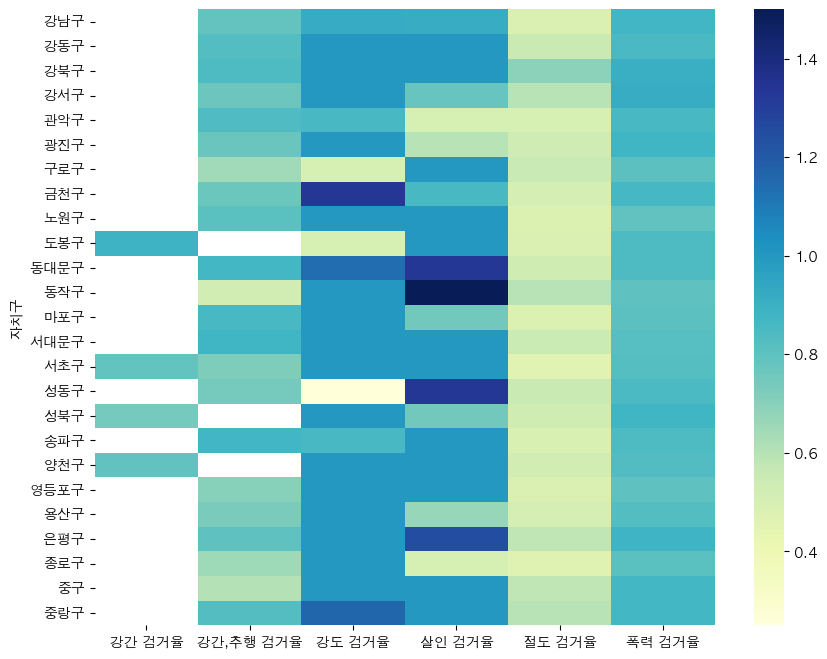

In [39]:
# 자치구별 검거율 히트맵

import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


plt.figure(figsize=(10, 8))
sns.heatmap(crime_rate, annot=False, cmap="YlGnBu")
plt.show()

In [40]:
cctv

,자치구,안심 주소,위도,경도,CCTV 수량
0,중랑구,중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032,37.5977,127.0728,1
1,중랑구,면목2동 146-1(고정3)_C-MM02-0013-C,37.5879,127.0812,1
2,중랑구,중화2동 326-88 (골목길 통신주)_C-JH02-0032-1,37.5976,127.0727,1
3,중랑구,면목2동 146-1(고정2)_C-MM02-0013-B,37.5879,127.0812,1
4,중랑구,중화2동 327-27 (고정)_C-JH02-0044-A,37.5986,127.0747,1
...,...,...,...,...,...
83729,강남구,대치2-256-02,37.5059,127.0589,1
83730,강남구,수서-208-01,37.4902,127.1014,1
83731,강남구,수서-208-02,37.4902,127.1014,1
83732,강남구,대치2-256-03,37.5059,127.0589,1


In [41]:
cctv = cctv.groupby('자치구').sum()

In [42]:
# cctv 데이터 주소, 위도, 경도 컬럼 삭제

cctv.drop(columns = ["안심 주소", "위도", "경도"], inplace=True)

In [43]:
cctv

,CCTV 수량
자치구,
강남구,7009
강동구,3191
강북구,2858
강서구,3481
관악구,5366
광진구,4091
구로구,4050
금천구,2725
노원구,2655


In [44]:
# 인구수 데이터 국적, 성별 컬럼 삭제

pop = pop.groupby('자치구').sum()
pop.drop(columns = ["국적", "성별"], inplace=True)
pop

,인구수
자치구,
강남구,546291
강동구,462453
강북구,294804
강서구,569978
관악구,500582
광진구,351959
구로구,416815
금천구,242076
노원구,504423


In [45]:
# cctv 데이터와 인구수 데이터 합치기

seoul = pd.merge(cctv, pop, on='자치구')

In [46]:
seoul

,CCTV 수량,인구수
자치구,,
강남구,7009,546291
강동구,3191,462453
강북구,2858,294804
강서구,3481,569978
관악구,5366,500582
광진구,4091,351959
구로구,4050,416815
금천구,2725,242076
노원구,2655,504423


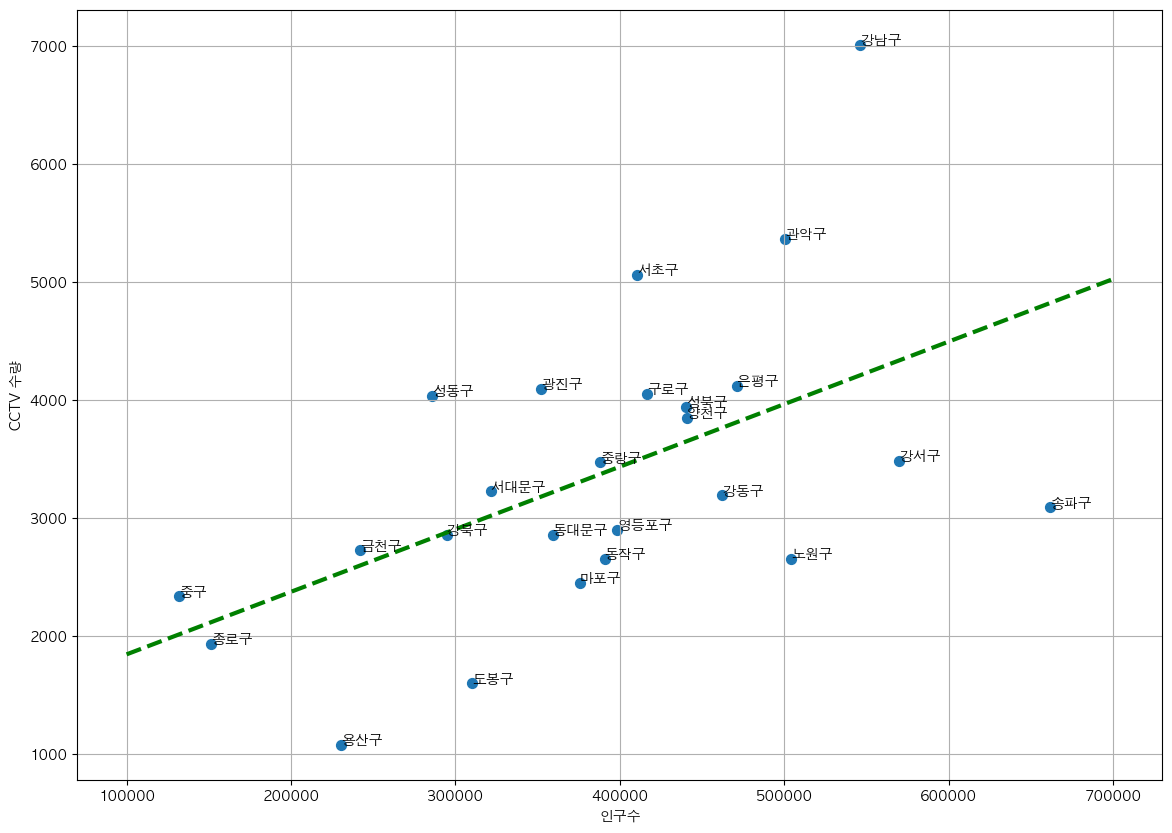

In [47]:
fp1 = np.polyfit(seoul['인구수'], seoul['CCTV 수량'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(14, 10))
plt.scatter(seoul['인구수'], seoul['CCTV 수량'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV 수량')
for n in range(25):
    plt.text(seoul['인구수'][n], seoul['CCTV 수량'][n], seoul.index[n], fontsize=10)
plt.grid()
plt.show()

* 인구수가 많을수록 CCTV수량이 많은 것으로 보임

In [48]:
# 상관계수

seoul.corr()

,CCTV 수량,인구수
CCTV 수량,1.000000,0.533353
인구수,0.533353,1.000000


In [49]:
# 범죄 데이터와 합치기

seoul_crime = pd.merge(seoul, crime_norm, on='자치구')

In [50]:
seoul_crime

,CCTV 수량,인구수,강간,"강간,추행",강도,살인,절도,폭력,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
자치구,,,,,,,,,,,,,,
강남구,7009,546291,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.785467,0.920000,0.916667,0.489039,0.870212
강동구,3191,462453,0.000000,0.214533,0.208333,0.181818,0.525000,0.326502,NaN,0.830645,1.000000,1.000000,0.551489,0.852890
강북구,2858,294804,0.000000,0.235294,0.000000,0.272727,0.003125,0.172799,NaN,0.845588,1.000000,1.000000,0.691120,0.907448
강서구,3481,569978,0.000000,0.425606,0.083333,0.727273,0.480000,0.505822,NaN,0.764228,1.000000,0.777778,0.598052,0.917541
관악구,5366,500582,0.000000,0.555363,0.250000,0.636364,0.680000,0.575687,NaN,0.838006,0.857143,0.500000,0.499462,0.856762
광진구,4091,351959,0.000000,0.359862,0.125000,0.363636,0.401250,0.206800,NaN,0.774038,1.000000,0.600000,0.533239,0.879121
구로구,4050,416815,0.000000,0.314879,0.041667,0.363636,0.386250,0.416861,NaN,0.648352,0.500000,1.000000,0.553957,0.805978
금천구,2725,242076,0.000000,0.231834,0.083333,0.545455,0.150625,0.125757,NaN,0.768657,1.333333,0.857143,0.513327,0.864275
노원구,2655,504423,0.000000,0.269896,0.083333,0.454545,0.368125,0.413135,NaN,0.807692,1.000000,1.000000,0.480529,0.796735


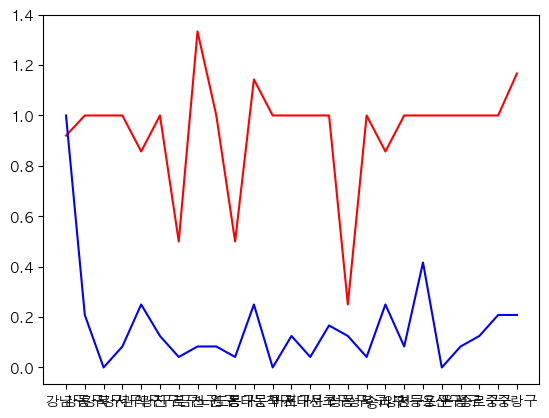

In [51]:
y1 = seoul_crime["강도 검거율"]
y2 = seoul_crime["강도"]


plt.plot(seoul_crime.index, y1, color = 'red')
plt.plot(seoul_crime.index, y2, color = 'blue')

plt.show()

In [52]:
crime_norm.corr()

,강간,"강간,추행",강도,살인,절도,폭력,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
강간,1.000000,-0.515216,-0.186216,-0.265608,-0.258403,-0.214650,-0.431491,-0.106871,-0.081014,-0.056118,-0.195192,0.033276
"강간,추행",-0.515216,1.000000,0.775369,0.745119,0.797829,0.814375,-0.181827,0.093875,0.094473,-0.165090,-0.238554,-0.005414
강도,-0.186216,0.775369,1.000000,0.631066,0.760986,0.781869,-0.234293,0.124388,0.046209,-0.035977,-0.309543,0.074230
살인,-0.265608,0.745119,0.631066,1.000000,0.562919,0.677930,-0.341740,-0.088503,0.173527,-0.366592,-0.260420,0.189920
절도,-0.258403,0.797829,0.760986,0.562919,1.000000,0.931505,-0.397067,0.210100,0.105539,-0.132402,-0.323297,-0.000243
폭력,-0.214650,0.814375,0.781869,0.677930,0.931505,1.000000,-0.667117,0.182234,0.072471,-0.174920,-0.274314,0.055858
강간 검거율,-0.431491,-0.181827,-0.234293,-0.341740,-0.397067,-0.667117,1.000000,NaN,-0.937494,0.638468,-0.409088,-0.413541
"강간,추행 검거율",-0.106871,0.093875,0.124388,-0.088503,0.210100,0.182234,NaN,1.000000,0.171332,-0.158830,-0.046896,0.286525
강도 검거율,-0.081014,0.094473,0.046209,0.173527,0.105539,0.072471,-0.937494,0.171332,1.000000,-0.188641,0.065072,0.140983
살인 검거율,-0.056118,-0.165090,-0.035977,-0.366592,-0.132402,-0.174920,0.638468,-0.158830,-0.188641,1.000000,0.353336,-0.131049


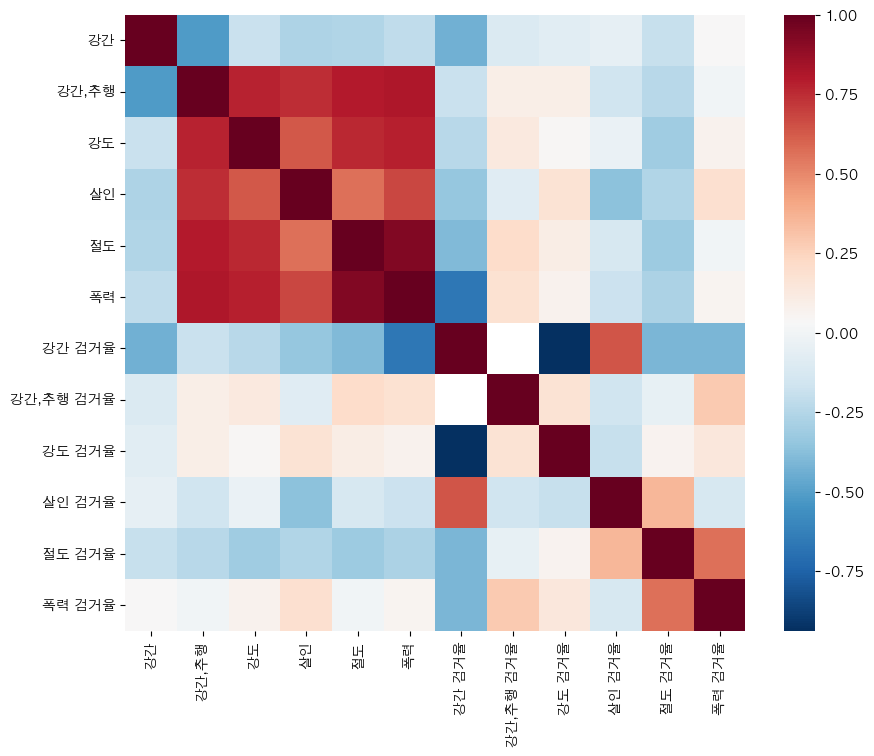

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(crime_norm.corr(), cmap = "RdBu_r", annot=False)
plt.show()

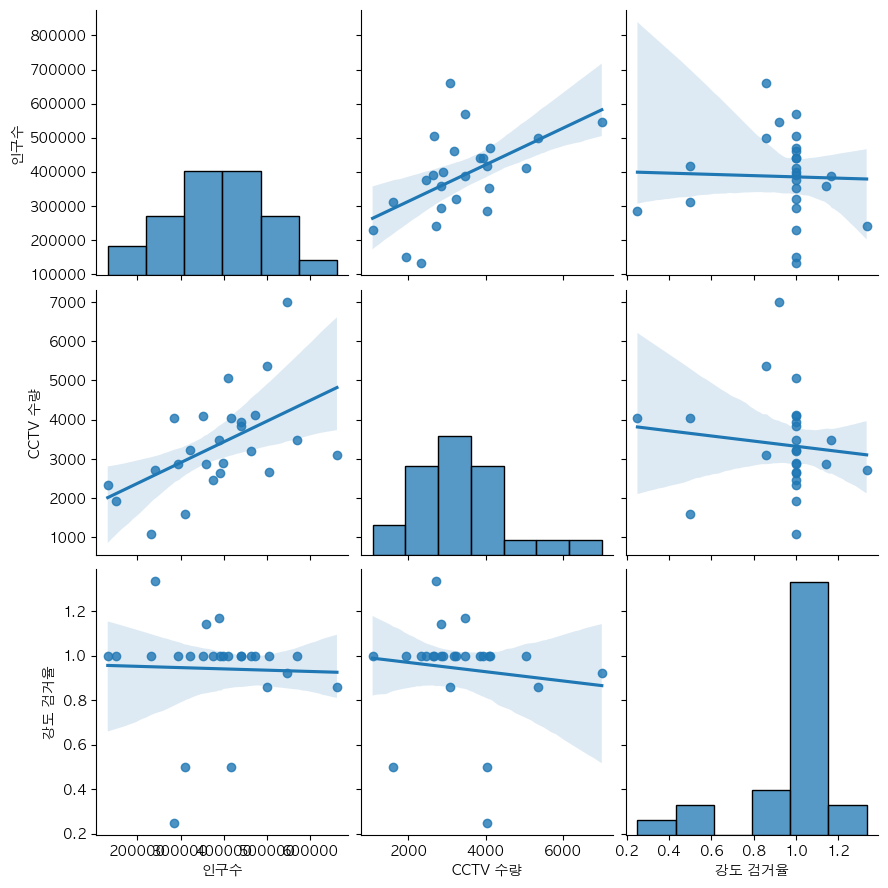

In [54]:
sns.pairplot(seoul_crime, vars=["인구수","CCTV 수량","강도 검거율"], kind="reg", height=3)
plt.show()

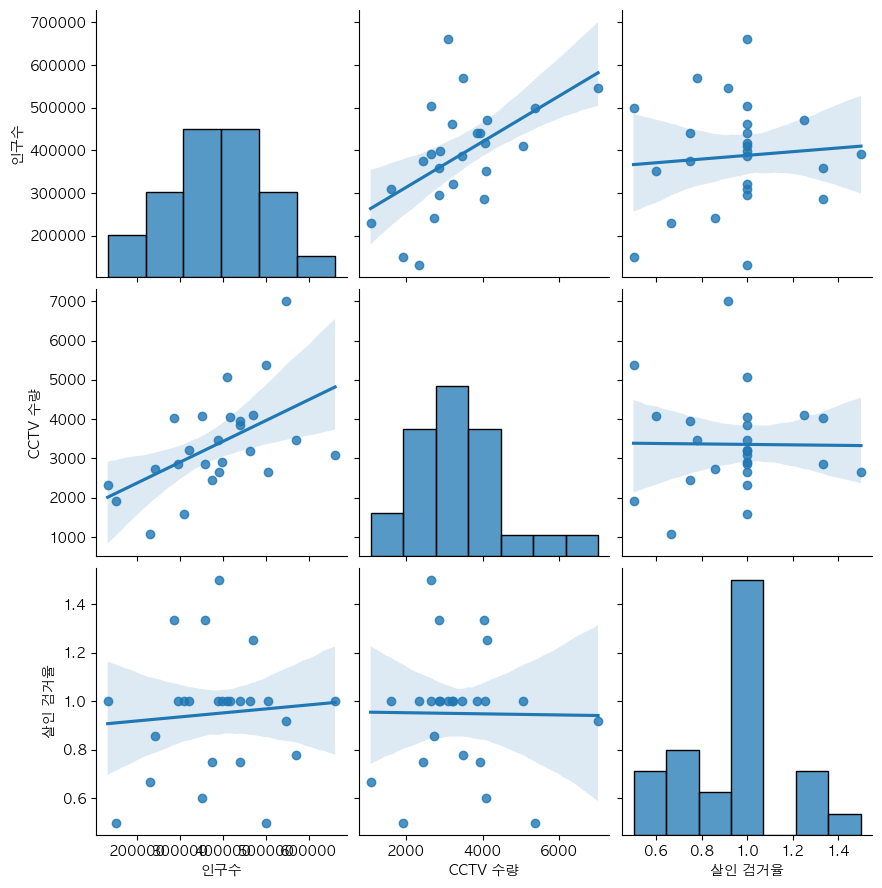

In [55]:
sns.pairplot(seoul_crime, vars=["인구수","CCTV 수량","살인 검거율"], kind="reg", height=3)
plt.show()

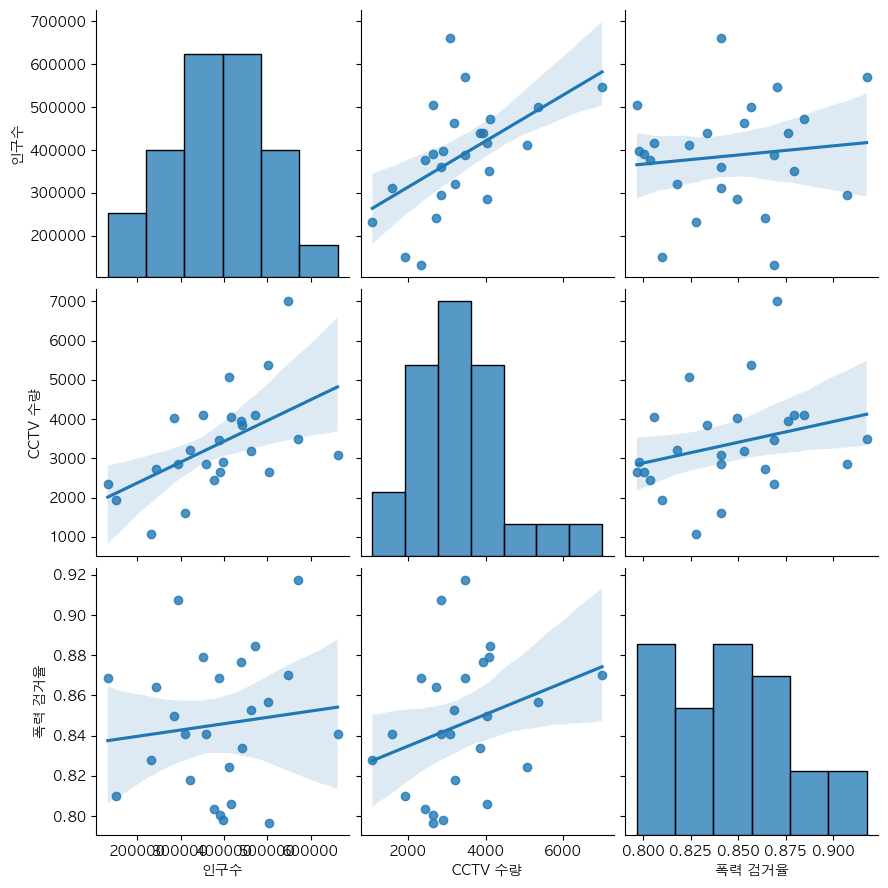

In [56]:
sns.pairplot(seoul_crime, vars=["인구수","CCTV 수량","폭력 검거율"], kind="reg", height=3)
plt.show()

In [57]:
corr = seoul_crime.corr()

In [58]:
corr

,CCTV 수량,인구수,강간,"강간,추행",강도,살인,절도,폭력,강간 검거율,"강간,추행 검거율",강도 검거율,살인 검거율,절도 검거율,폭력 검거율
CCTV 수량,1.000000,0.533353,0.073865,0.564128,0.611674,0.551805,0.619046,0.626435,-0.823548,0.173168,-0.116751,-0.011702,-0.069502,0.288784
인구수,0.533353,1.000000,0.078501,0.374584,0.326618,0.203311,0.688478,0.708008,-0.943521,0.397797,-0.032638,0.084481,-0.101158,0.115933
강간,0.073865,0.078501,1.000000,-0.515216,-0.186216,-0.265608,-0.258403,-0.214650,-0.431491,-0.106871,-0.081014,-0.056118,-0.195192,0.033276
"강간,추행",0.564128,0.374584,-0.515216,1.000000,0.775369,0.745119,0.797829,0.814375,-0.181827,0.093875,0.094473,-0.165090,-0.238554,-0.005414
강도,0.611674,0.326618,-0.186216,0.775369,1.000000,0.631066,0.760986,0.781869,-0.234293,0.124388,0.046209,-0.035977,-0.309543,0.074230
살인,0.551805,0.203311,-0.265608,0.745119,0.631066,1.000000,0.562919,0.677930,-0.341740,-0.088503,0.173527,-0.366592,-0.260420,0.189920
절도,0.619046,0.688478,-0.258403,0.797829,0.760986,0.562919,1.000000,0.931505,-0.397067,0.210100,0.105539,-0.132402,-0.323297,-0.000243
폭력,0.626435,0.708008,-0.214650,0.814375,0.781869,0.677930,0.931505,1.000000,-0.667117,0.182234,0.072471,-0.174920,-0.274314,0.055858
강간 검거율,-0.823548,-0.943521,-0.431491,-0.181827,-0.234293,-0.341740,-0.397067,-0.667117,1.000000,NaN,-0.937494,0.638468,-0.409088,-0.413541
"강간,추행 검거율",0.173168,0.397797,-0.106871,0.093875,0.124388,-0.088503,0.210100,0.182234,NaN,1.000000,0.171332,-0.158830,-0.046896,0.286525


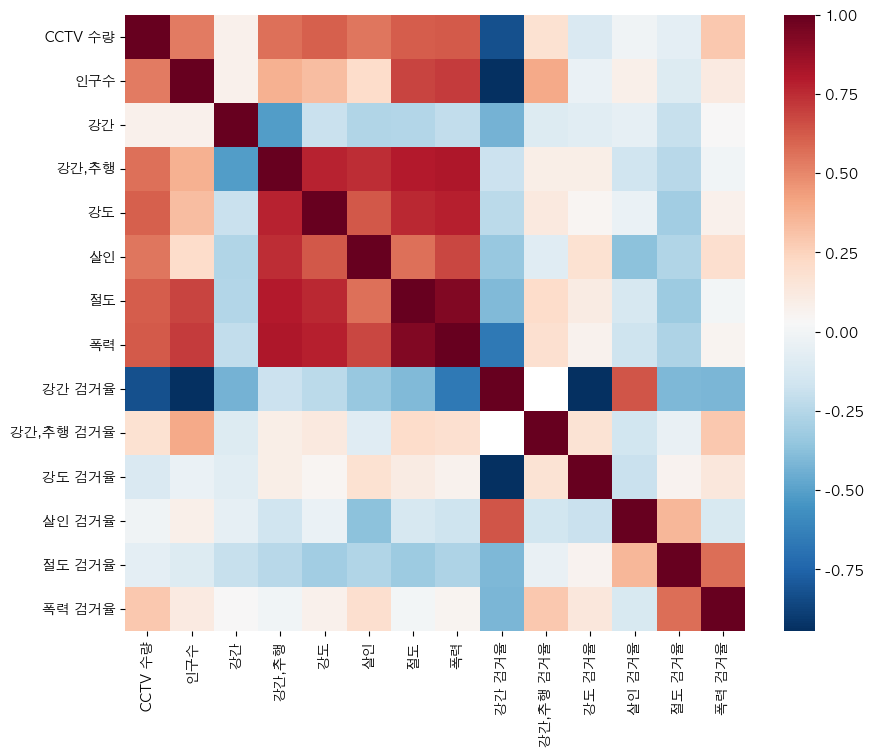

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap = "RdBu_r", annot=False)
plt.show()